<a href="https://colab.research.google.com/github/alamoorubabaiah/DATA-ANALYTICS-PROJECTS/blob/main/DATA_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Sample dataset on student performance and study habits
data = {
    "student_id": range(1, 21),
    "study_time_hours": [1, 2, 3, 2, 4, 5, 1, 3, 2, 4, 3, 5, 2, 3, 4, 1, 2, 5, 4, 3],
    "sleep_hours": [6, 7, 5, 8, 6, 7, 6, 5, 7, 8, 6, 7, 5, 6, 8, 7, 6, 7, 5, 6],
    "internet_usage": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes",
                       "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "free_time": [3, 2, 4, 3, 2, 5, 3, 4, 3, 2, 4, 3, 5, 2, 3, 4, 3, 2, 4, 3],
    "absences": [2, 0, 3, 1, 0, 2, 4, 1, 3, 0, 2, 1, 5, 0, 2, 3, 1, 2, 3, 1],
    "parental_education": ["High School", "Bachelor", "High School", "Master", "Bachelor", "PhD",
                           "High School", "Bachelor", "Master", "PhD", "High School", "Bachelor",
                           "Master", "PhD", "Bachelor", "High School", "Master", "PhD", "Bachelor", "Master"],
    "final_grade": [65, 78, 70, 85, 88, 92, 60, 75, 80, 90, 74, 95, 68, 89, 91, 62, 79, 93, 87, 76]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,student_id,study_time_hours,sleep_hours,internet_usage,free_time,absences,parental_education,final_grade
0,1,1,6,Yes,3,2,High School,65
1,2,2,7,No,2,0,Bachelor,78
2,3,3,5,Yes,4,3,High School,70
3,4,2,8,Yes,3,1,Master,85
4,5,4,6,No,2,0,Bachelor,88


In [ ]:
# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum())

# 2. Check data types
print("\nData Types:\n", df.dtypes)

# 3. Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# 4. Encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['internet_usage_encoded'] = label_encoder.fit_transform(df['internet_usage'])  # Yes=1, No=0
df['parental_education_encoded'] = label_encoder.fit_transform(df['parental_education'])

# 5. Drop original categorical columns if needed
# df.drop(['internet_usage', 'parental_education'], axis=1, inplace=True)

# Final check
print("\nCleaned Dataset Preview:\n", df.head())


Missing Values:
 student_id            0
study_time_hours      0
sleep_hours           0
internet_usage        0
free_time             0
absences              0
parental_education    0
final_grade           0
dtype: int64

Data Types:
 student_id             int64
study_time_hours       int64
sleep_hours            int64
internet_usage        object
free_time              int64
absences               int64
parental_education    object
final_grade            int64
dtype: object

Cleaned Dataset Preview:
    student_id  study_time_hours  sleep_hours internet_usage  free_time  \
0           1                 1            6            Yes          3   
1           2                 2            7             No          2   
2           3                 3            5            Yes          4   
3           4                 2            8            Yes          3   
4           5                 4            6             No          2   

   absences parental_education  final_grade  i

Summary Statistics:
        student_id  study_time_hours  sleep_hours  free_time   absences  \
count    20.00000         20.000000    20.000000  20.000000  20.000000   
mean     10.50000          2.950000     6.400000   3.200000   1.800000   
std       5.91608          1.316894     0.994723   0.951453   1.399248   
min       1.00000          1.000000     5.000000   2.000000   0.000000   
25%       5.75000          2.000000     6.000000   2.750000   1.000000   
50%      10.50000          3.000000     6.000000   3.000000   2.000000   
75%      15.25000          4.000000     7.000000   4.000000   3.000000   
max      20.00000          5.000000     8.000000   5.000000   5.000000   

       final_grade  internet_usage_encoded  parental_education_encoded  
count    20.000000               20.000000                   20.000000  
mean     79.850000                0.550000                    1.350000  
std      10.888309                0.510418                    1.136708  
min      60.000000  

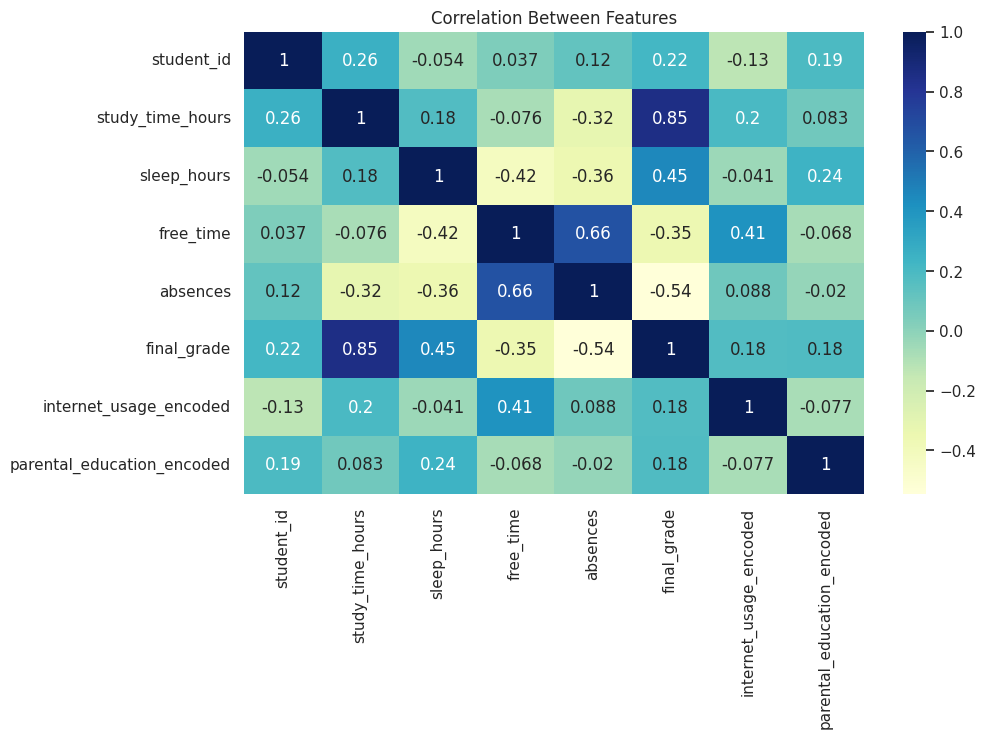

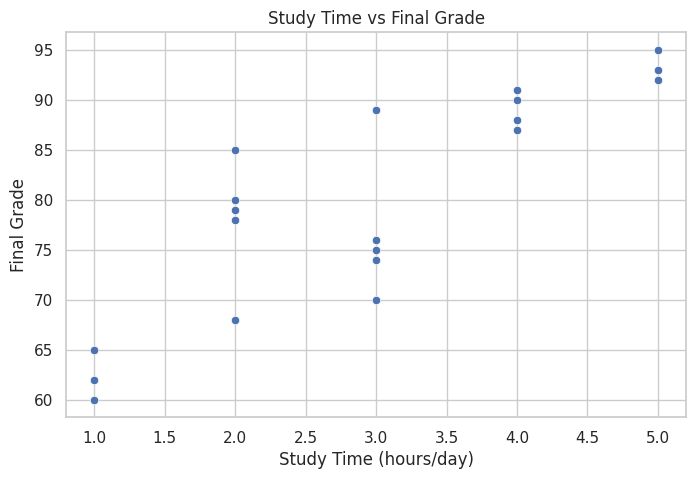

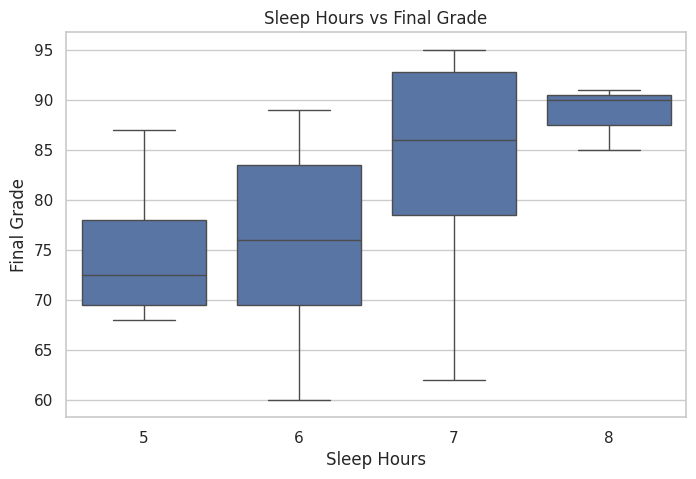

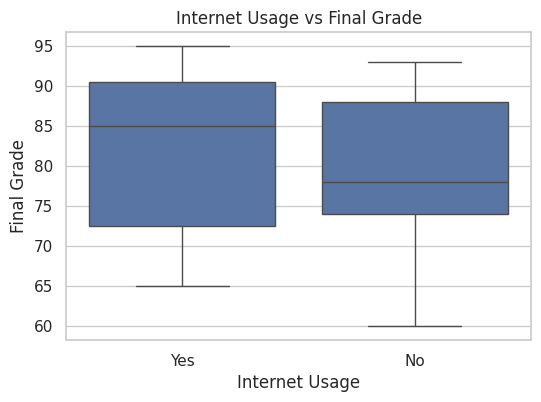

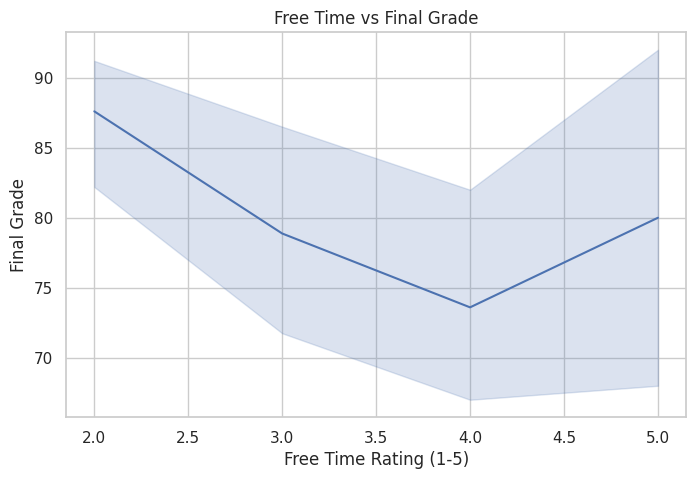

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Basic statistics
print("Summary Statistics:\n", df.describe())

# 2. Correlation heatmap (numerical columns)
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Features")
plt.show()

# 3. Study time vs Final Grade
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_time_hours', y='final_grade', data=df)
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours/day)")
plt.ylabel("Final Grade")
plt.show()

# 4. Sleep vs Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='sleep_hours', y='final_grade', data=df)
plt.title("Sleep Hours vs Final Grade")
plt.xlabel("Sleep Hours")
plt.ylabel("Final Grade")
plt.show()

# 5. Internet usage vs Final Grade
plt.figure(figsize=(6, 4))
sns.boxplot(x='internet_usage', y='final_grade', data=df)
plt.title("Internet Usage vs Final Grade")
plt.xlabel("Internet Usage")
plt.ylabel("Final Grade")
plt.show()

# 6. Free time vs Final Grade
plt.figure(figsize=(8, 5))
sns.lineplot(x='free_time', y='final_grade', data=df)
plt.title("Free Time vs Final Grade")
plt.xlabel("Free Time Rating (1-5)")
plt.ylabel("Final Grade")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Define X (features) and y (target)
features = ['study_time_hours', 'sleep_hours', 'internet_usage_encoded',
            'free_time', 'absences', 'parental_education_encoded']
X = df[features]
y = df['final_grade']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 2.90
Mean Squared Error (MSE): 11.51
R² Score: 0.92
